In [56]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [57]:
df = pd.read_csv('./combined_copy.csv', usecols=['MC', 'STATID', 'SDATE', 'Y', 'M', 'D', 'TEMP_°C', 'pH', 'TSS_mg/L', 'COND_mS/m', 'Ca_meq/L', 'Mg_meq/L', 'Na_meq/L', 'K_meq/L', 'ALK_meq/L', 'Cl_meq/L', 'SO4_meq/L', 'NO32_mg/L', 'NH4N_mg/L', 'TOTP_mg/L', 'DO_mg/L', 'CODMN_mg/L'])


# only keep 48 stations in 48_station.txt
# according with column 'STATID' in df
with open('./48_stations.txt', 'r') as f:
    stations = f.readlines()
stations = [x.strip() for x in stations]
df = df[df['STATID'].isin(stations)]

/tmp/ipykernel_3548198/412657427.py:1: DtypeWarning: Columns (12,14,18,19,21,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./combined_copy.csv', usecols=['MC', 'STATID', 'SDATE', 'Y', 'M', 'D', 'TEMP_°C', 'pH', 'TSS_mg/L', 'COND_mS/m', 'Ca_meq/L', 'Mg_meq/L', 'Na_meq/L', 'K_meq/L', 'ALK_meq/L', 'Cl_meq/L', 'SO4_meq/L', 'NO32_mg/L', 'NH4N_mg/L', 'TOTP_mg/L', 'DO_mg/L', 'CODMN_mg/L'])


In [58]:
df.isnull().sum()

MC               0
STATID           0
SDATE            0
Y                0
M                0
D                0
TEMP_°C       1153
pH              58
TSS_mg/L       421
COND_mS/m       32
Ca_meq/L      1140
Mg_meq/L      1134
Na_meq/L      2157
K_meq/L       2154
ALK_meq/L       31
Cl_meq/L      1123
SO4_meq/L     1119
NO32_mg/L       94
NH4N_mg/L       97
TOTP_mg/L       84
DO_mg/L        665
CODMN_mg/L     140
dtype: int64

In [59]:
df = df.replace(' ', np.nan)
df = df.replace('\n', np.nan)
df = df.replace('-', np.nan)
df = df.replace('<0.4', np.nan)
df = df.replace('<0.40', np.nan)
df = df.replace('<0.001', np.nan)
df = df.replace('', np.nan)
df = df.replace('No water', np.nan)

df['DO_mg/L'] = pd.to_numeric(df['DO_mg/L'], errors='coerce')

df['TEMP_°C'] = df['TEMP_°C'].astype(float)
# df['TSS_mg'] = df['TSS_mg'].astype(float)
df['Na_meq/L'] = df['Na_meq/L'].astype(float)
df['K_meq/L'] = df['K_meq/L'].astype(float)
df['Cl_meq/L'] = df['Cl_meq/L'].astype(float)
# df['TOTN_mg/L'] = df['TOTN_mg/L'].astype(float)
df['CODMN_mg/L'] = df['CODMN_mg/L'].astype(float)
df['DO_mg/L'] = df['DO_mg/L'].astype(float)
# df['EC_CAT/EC'] = df['EC_CAT/EC'].astype(float)
# df['EC_DIFF'] = df['EC_DIFF'].astype(float)
df['TSS_mg/L'] = df['TSS_mg/L'].astype(float)

In [60]:
df.shape

(12288, 22)

In [61]:
# outlier_ranges = {
#     "TEMP_°C": (18, 32),
#     "TSS_mg/L": (0, 360),
#     "COND_mS/m": (0, 30),
#     "Ca_meq/L": (0, 2),
#     "pH": (6, 9),
#     "Na_meq/L": (0, 1),
#     # "Mg_meq/L": (0, 0.8),
#     "ALK_meq/L": (0, 2.5),
#     "Cl_meq/L": (0, 1.2),
#     "K_meq/L": (0, 0.15),
#     "SO4_meq/L": (0, 0.7),
#     "NO32_mg/L": (0, 0.8),
#     "NH4N_mg/L": (0, 0.4),
#     "TOTP_mg/L": (0, 0.4),
#     "CODMN_mg/L": (0, 10),
#     "DO_mg/L": (0, 15)
# }


In [62]:
df = df[(df['TEMP_°C'] != 0) & (df['pH'] != 0) & (df['TSS_mg/L'] != 0) & (df['COND_mS/m'] != 0) & (df['Ca_meq/L'] != 0) & (df['Na_meq/L'] != 0) & (df['Mg_meq/L'] != 0) & (df['ALK_meq/L'] != 0) & (df['Cl_meq/L'] != 0) & (df['K_meq/L'] != 0) & (df['SO4_meq/L'] != 0) & (df['NO32_mg/L'] != 0) & (df['NH4N_mg/L'] != 0) & (df['TOTP_mg/L'] != 0) & (df['CODMN_mg/L'] != 0) & (df['DO_mg/L'] != 0)]

In [63]:
# imputer nan values with 0
df = df.fillna(0)

In [73]:
# df = df[df['TEMP_°C'] < 35]
# df = df[df['pH'] > 5]
# df = df[df['TSS_mg/L'] < 220]
# df = df[df['COND_mS/m'] < 50]
# df = df[df['Ca_meq/L'] < 2]
# df = df[df['Na_meq/L'] < 1]
# df = df[df['Mg_meq/L'] < 0.8]
# df = df[df['ALK_meq/L'] < 3]
# df = df[df['Cl_meq/L'] < 1]
# df = df[df['K_meq/L'] < 0.2]
# df = df[df['SO4_meq/L'] < 0.7]
# df = df[df['NO32_mg/L'] < 1]
# df = df[df['NH4N_mg/L'] < 0.15]
# df = df[df['TOTP_mg/L'] < 0.4]
# # df = df[df['DO_mg/L'] < 12]
# df = df[df['CODMN_mg/L'] < 10]

outlier_ranges = {
    "TEMP_°C": (0, 35),
    "TSS_mg/L": (0, 220),
    "COND_mS/m": (0, 50),
    "Ca_meq/L": (0, 2),
    "pH": (0, 9),
    "Na_meq/L": (0, 1),
    "Mg_meq/L": (0, 0.8),
    "ALK_meq/L": (0, 3),
    "Cl_meq/L": (0, 1),
    "K_meq/L": (0, 0.2),
    "SO4_meq/L": (0, 0.7),
    "NO32_mg/L": (0, 1),
    "NH4N_mg/L": (0, 0.15),
    "TOTP_mg/L": (0, 0.4),
    "CODMN_mg/L": (0, 10),
    "DO_mg/L": (0, 12)
}

In [80]:
def plot_outlier_range(df):
    plt.figure(figsize=(9, 15))
    for i, column in enumerate(df.columns[6:], 1):
        plt.subplot(8,2, i)
        sns.histplot(df[column], kde=True, bins=30)
        plt.axvline(outlier_ranges[column][0], color='r', linestyle='--')
        plt.axvline(outlier_ranges[column][1], color='r', linestyle='--')
        plt.title(column)
        plt.grid(True)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('outlier_range.pdf')

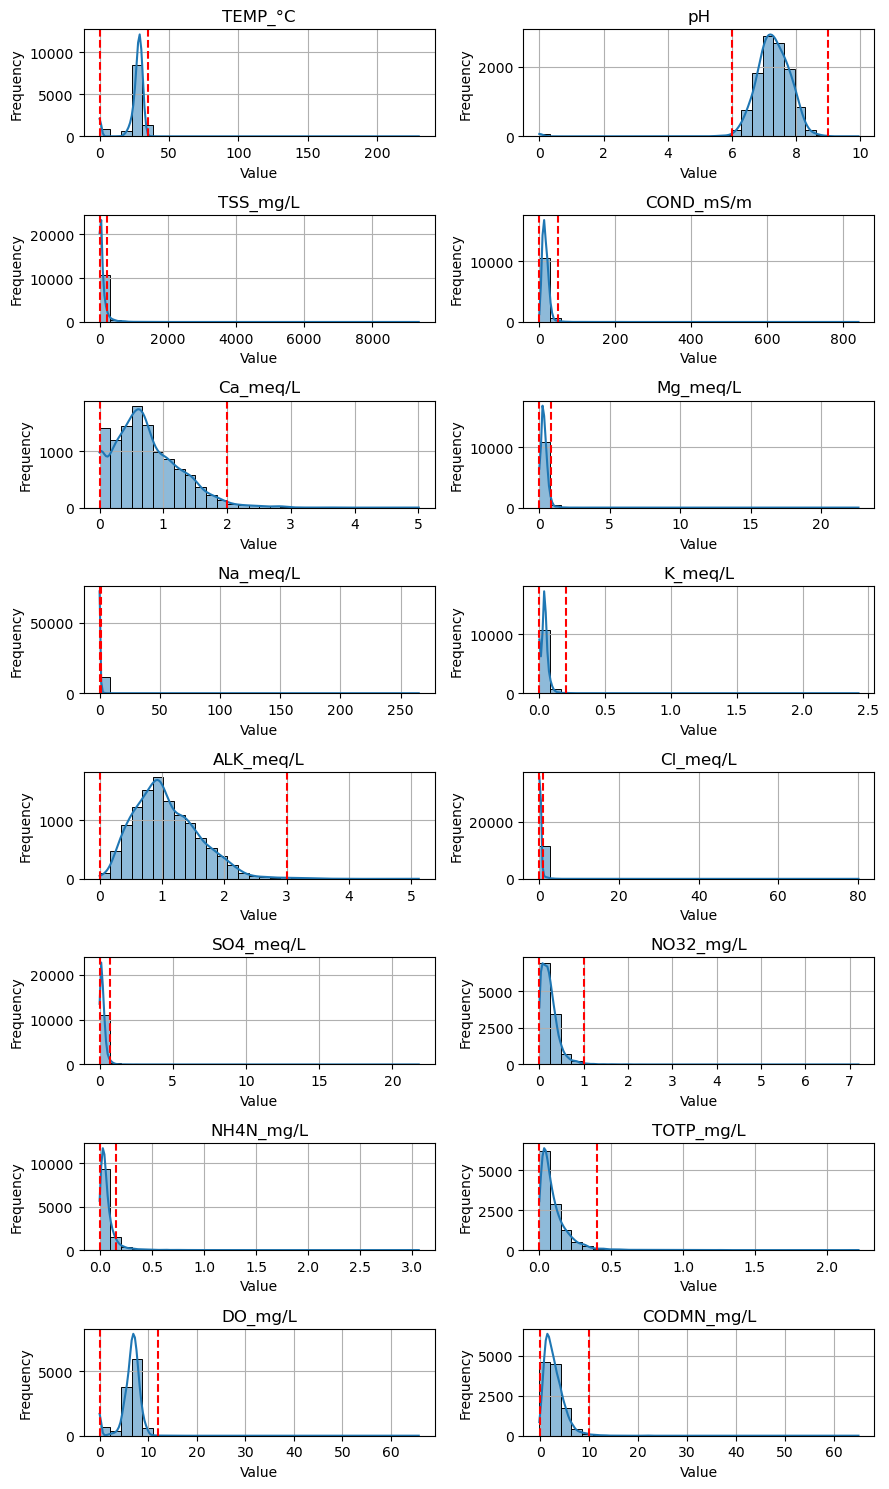

In [81]:
plot_outlier_range(df)

In [53]:
# drop outliers that are out of range
for col, (lower, upper) in outlier_ranges.items():
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [54]:
df.columns

Index(['MC', 'STATID', 'SDATE', 'Y', 'M', 'D', 'TEMP_°C', 'pH', 'TSS_mg/L',
       'COND_mS/m', 'Ca_meq/L', 'Mg_meq/L', 'Na_meq/L', 'K_meq/L', 'ALK_meq/L',
       'Cl_meq/L', 'SO4_meq/L', 'NO32_mg/L', 'NH4N_mg/L', 'TOTP_mg/L',
       'DO_mg/L', 'CODMN_mg/L'],
      dtype='object')

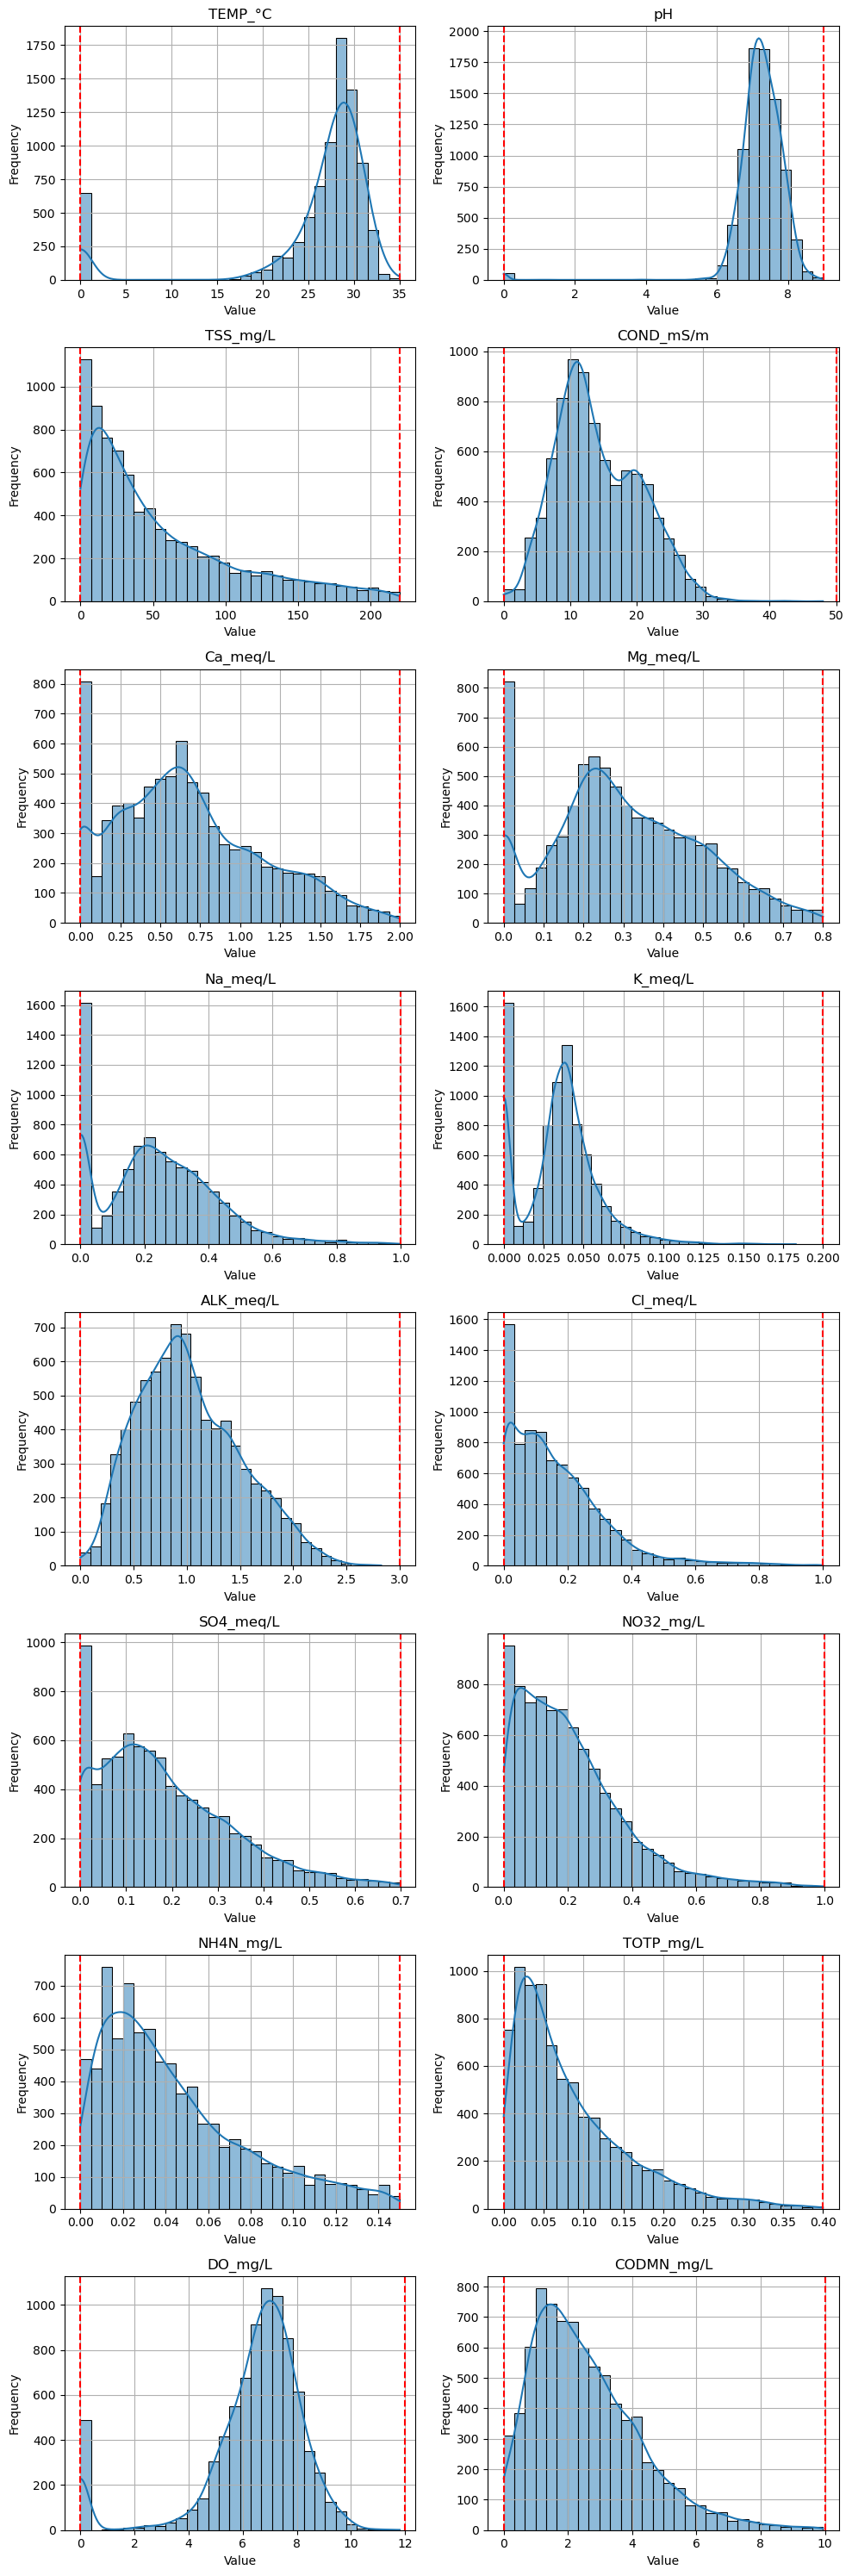

In [55]:
plot_outlier_range(df)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8165 entries, 0 to 29617
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MC          8165 non-null   object 
 1   STATID      8165 non-null   object 
 2   SDATE       8165 non-null   object 
 3   Y           8165 non-null   int64  
 4   M           8165 non-null   int64  
 5   D           8165 non-null   int64  
 6   TEMP_°C     8165 non-null   float64
 7   pH          8165 non-null   float64
 8   TSS_mg/L    8165 non-null   float64
 9   COND_mS/m   8165 non-null   float64
 10  Ca_meq/L    8165 non-null   float64
 11  Mg_meq/L    8165 non-null   float64
 12  Na_meq/L    8165 non-null   float64
 13  K_meq/L     8165 non-null   float64
 14  ALK_meq/L   8165 non-null   float64
 15  Cl_meq/L    8165 non-null   float64
 16  SO4_meq/L   8165 non-null   float64
 17  NO32_mg/L   8165 non-null   float64
 18  NH4N_mg/L   8165 non-null   float64
 19  TOTP_mg/L   8165 non-null   flo

In [89]:
# drop rows with 0 values


In [90]:
# replace 0 with nan
df = df.replace(0, np.nan)
df.isnull().sum()

MC               0
STATID           0
SDATE            0
Y                0
M                0
D                0
TEMP_°C        648
pH              51
TSS_mg/L       332
COND_mS/m       32
Ca_meq/L       791
Mg_meq/L       787
Na_meq/L      1558
K_meq/L       1558
ALK_meq/L       31
Cl_meq/L       782
SO4_meq/L      782
NO32_mg/L       77
NH4N_mg/L       91
TOTP_mg/L       63
DO_mg/L        490
CODMN_mg/L     115
dtype: int64

In [74]:
df.to_csv('./combined_0_to_nan.csv', index=False)

In [49]:
df = df.dropna()
df.shape
df.to_csv('./combined_0_to_nan_drop.csv', index=False)